# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [205]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


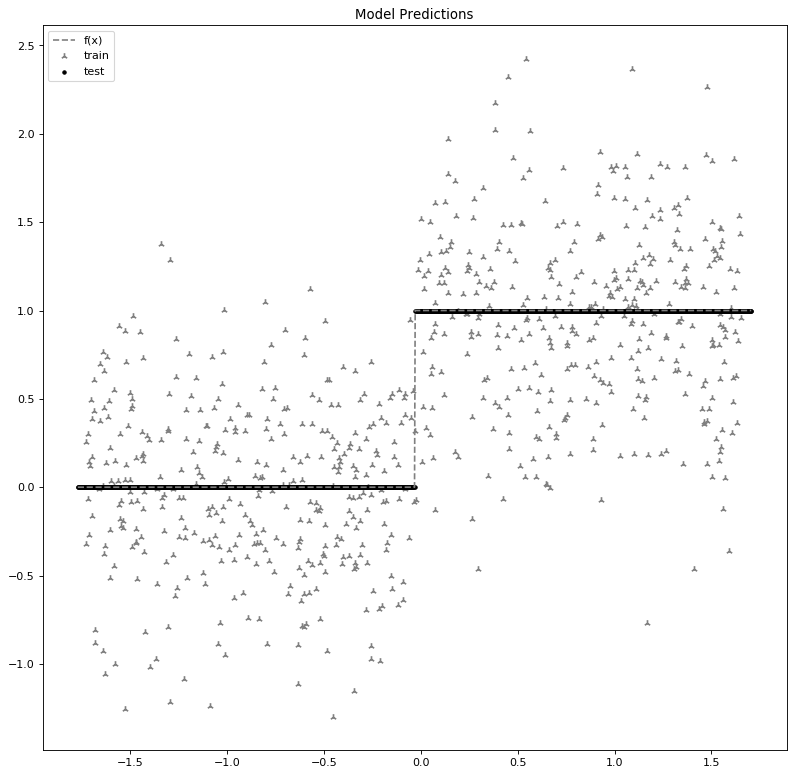

In [206]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "jumpdiscontinuity"
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

# Benchmark Models

Run univariate regression benchmarks file:

In [42]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Batch computation too fast (0.0876s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.8s finished


Epoch 1/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7044 - mse: 0.7624 - mae: 0.7044 - mape: 120.2010
Epoch 2/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7018 - mse: 0.7573 - mae: 0.7018 - mape: 116.0135
Epoch 3/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6993 - mse: 0.7521 - mae: 0.6993 - mape: 110.8132
Epoch 4/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6967 - mse: 0.7469 - mae: 0.6967 - mape: 104.8544
Epoch 5/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6942 - mse: 0.7418 - mae: 0.6942 - mape: 100.6684
Epoch 6/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6917 - mse: 0.7368 - mae: 0.6917 - mape: 100.0131
Epoch 7/10
47/47 [==============================] - 0s 2ms/step - loss: 0.6894 - mse: 0.7317 - mae: 0.6894 - mape: 105.0463
Epoch 8/10
47/47 [==============================] - 0s 2ms/step - loss: 0.6869 - mse: 0.7268 - mae: 0.6869 - mape: 109.1831
Epoch 9/

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [173]:
# Second Round Re-Initializations (Global Level) #
#================================================#
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


#### Boost input dimension if $d=1$, so that reconfigurations can be universal.

In [44]:
if d<= 1:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    # Bump Dimension so Reconfiguration network properties hold
    data_x = np.concatenate([data_x,data_x**2],axis=1)
    data_x_test = np.concatenate([data_x_test,data_x_test**2],axis=1)
    d = d+1
else:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    print("Modified Input since Dimension is too low")

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [45]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   12.2s finished


Epoch 1/10
47/47 [==============================] - 0s 4ms/step - loss: 0.7211 - mse: 0.7912 - mae: 0.7185 - mape: 153.3869
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.7140 - mse: 0.7760 - mae: 0.7114 - mape: 155.8248
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.7068 - mse: 0.7610 - mae: 0.7043 - mape: 159.0213
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6996 - mse: 0.7455 - mae: 0.6971 - mape: 163.6017
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6920 - mse: 0.7298 - mae: 0.6896 - mape: 167.2767
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6842 - mse: 0.7145 - mae: 0.6818 - mape: 169.1439
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6760 - mse: 0.6989 - mae: 0.6738 - mape: 174.5589
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6678 - mse: 0.6830 - mae: 0.6656 - mape: 177.8076
Epoch 9/

---
# Linear Model(s)
---

### NEU-OLS *(decoupled implementation)*

In [46]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_lin_reg = LinearRegression()
NEU_lin_reg.fit(data_x_featured_train,data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   10.5s finished


Epoch 1/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6225 - mse: 0.5958 - mae: 0.6205 - mape: 229.0456
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6145 - mse: 0.5817 - mae: 0.6125 - mape: 234.1270
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6066 - mse: 0.5684 - mae: 0.6047 - mape: 239.6789
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5989 - mse: 0.5550 - mae: 0.5970 - mape: 248.4868
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5913 - mse: 0.5422 - mae: 0.5894 - mape: 252.9528
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5841 - mse: 0.5302 - mae: 0.5823 - mape: 258.2437
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5188 - mae: 0.5755 - mape: 267.3673
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5704 - mse: 0.5079 - mae: 0.5687 - mape: 272.1176
Epoch 9/

---
# Non-Linear Models
---

### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [48]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train,NEU_KReg_y_hat_test, GBRF_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_KReg = np.concatenate([data_x_featured_train,
                                   NEU_KReg_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_KReg = np.concatenate([data_x_featured_test,
                                  NEU_KReg_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_KReg_y_hat_train, NEU_KReg_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_KReg, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_KReg)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0586s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.6s finished


Epoch 1/10
47/47 [==============================] - 0s 5ms/step - loss: 0.6456 - mse: 0.6429 - mae: 0.6434 - mape: 114.3663
Epoch 2/10
47/47 [==============================] - 0s 6ms/step - loss: 0.6343 - mse: 0.6219 - mae: 0.6322 - mape: 118.2185
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6228 - mse: 0.6009 - mae: 0.6207 - mape: 123.8661
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6109 - mse: 0.5788 - mae: 0.6089 - mape: 134.1669
Epoch 5/10
47/47 [==============================] - 0s 5ms/step - loss: 0.5984 - mse: 0.5566 - mae: 0.5965 - mape: 140.6993
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.5859 - mse: 0.5345 - mae: 0.5841 - mape: 146.6221
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.5732 - mse: 0.5127 - mae: 0.5715 - mape: 157.3756
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5605 - mse: 0.4910 - mae: 0.5589 - mape: 163.7998
Epoch 9/

#### Visual Comaprison between the GBRF and the NEU-GBRF models:

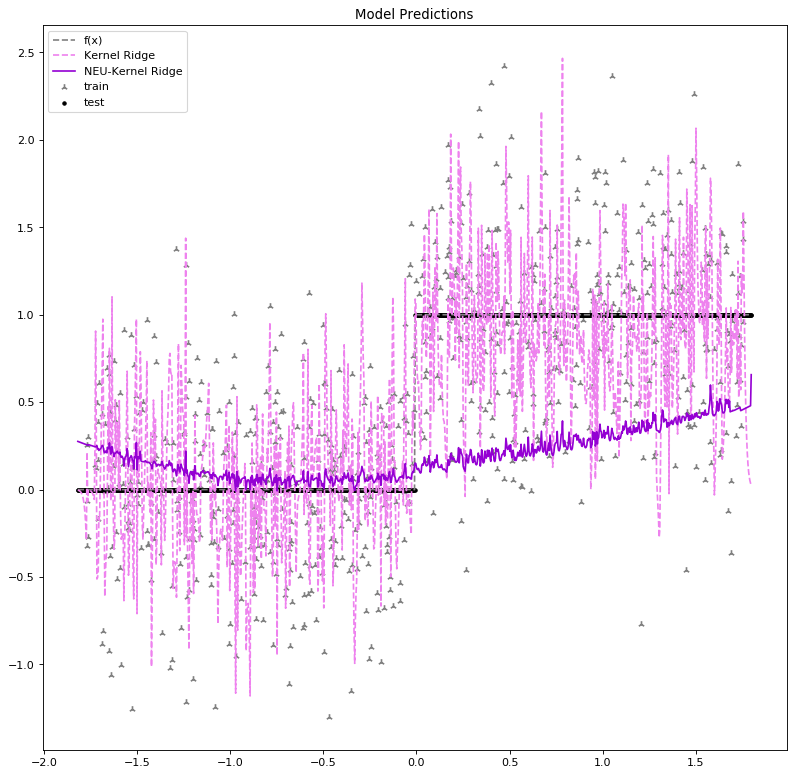

In [207]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.eps', format='eps')
plt.show()

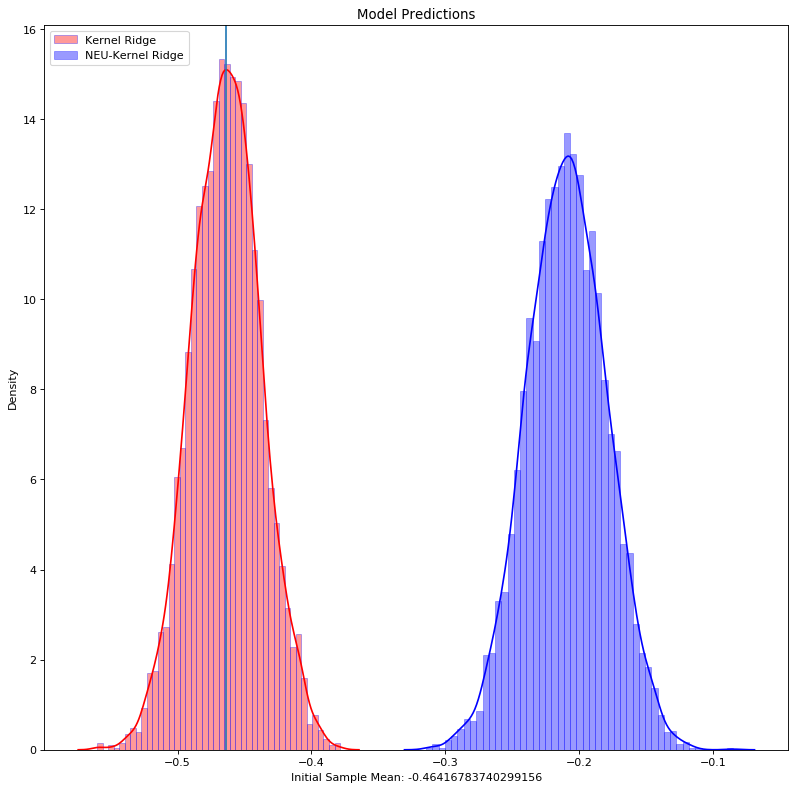

In [208]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [11]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
         train        test
MAE   0.005476    0.309726
MSE   0.000157    0.160939
MAPE  2.673027  124.043649
NEU-Kernel Ridge-Performance:
           train        test
MAE     0.572292    0.403223
MSE     0.513304    0.258526
MAPE  675.692020  193.379733


## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [12]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                         X_test = data_x_featured_test,
                                                                         y_train = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_GBRF = np.concatenate([data_x_featured_train,
                                   NEU_GBRF_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_GBRF = np.concatenate([data_x_featured_test,
                                  NEU_GBRF_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_GBRF_y_hat_train, NEU_GBRF_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_GBRF, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_GBRF)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0430s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.6s finished


Epoch 1/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6129 - mse: 0.5702 - mae: 0.6111 - mape: 5512.9121
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6065 - mse: 0.5591 - mae: 0.6046 - mape: 5529.6211
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5998 - mse: 0.5481 - mae: 0.5980 - mape: 5557.0234
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5931 - mse: 0.5373 - mae: 0.5913 - mape: 5568.6772
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5862 - mse: 0.5271 - mae: 0.5845 - mape: 5568.1030
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5798 - mse: 0.5171 - mae: 0.5781 - mape: 5489.0679
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5734 - mse: 0.5079 - mae: 0.5717 - mape: 5431.5308
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5675 - mse: 0.4987 - mae: 0.5658 - mape: 5316.0962


#### Visual Comaprison between the GBRF and the NEU-GBRF models:

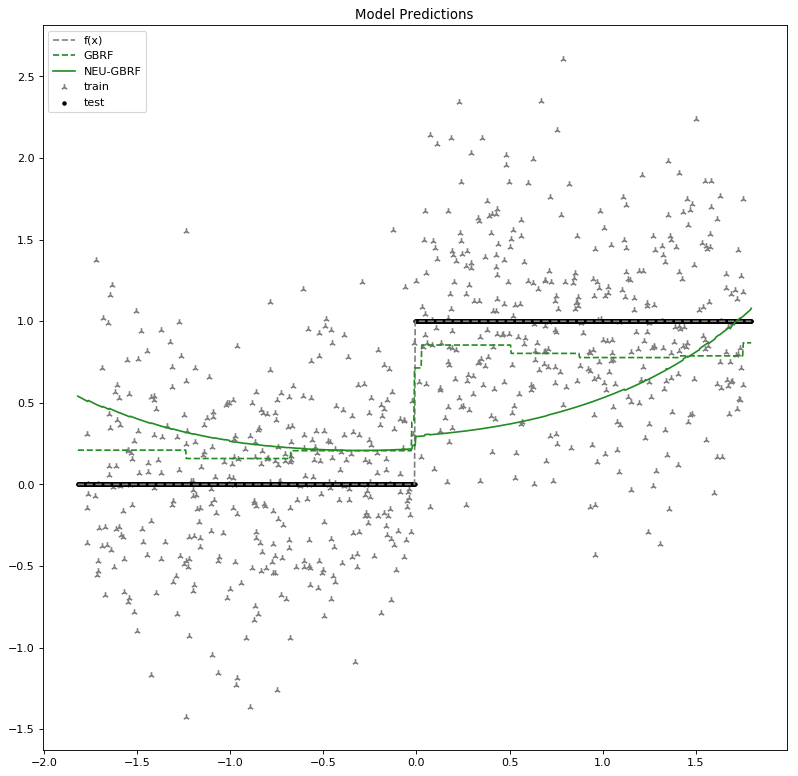

In [57]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.eps', format='eps')
plt.show()

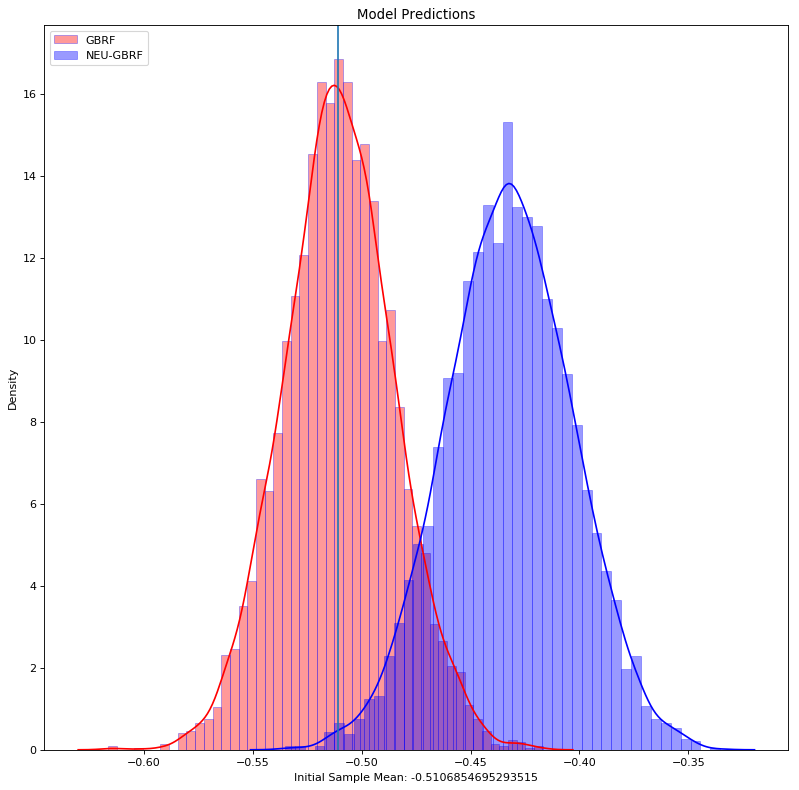

In [209]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [14]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
           train       test
MAE     0.430048   0.160843
MSE     0.296299   0.029043
MAPE  124.933598  56.762638
NEU-GBRF-Performance:
           train        test
MAE     0.548921    0.373426
MSE     0.473324    0.173200
MAPE  156.118464  105.314191


---
## Neural Networks: 
---
### NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

Here we only use reconfiguration networks to learn an appropriate readout map.

In [15]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.4s finished


Epoch 1/10
47/47 [==============================] - 0s 7ms/step - loss: 0.7171 - mse: 0.7875 - mae: 0.7146 - mape: 867.9054
Epoch 2/10
47/47 [==============================] - 0s 7ms/step - loss: 0.7096 - mse: 0.7708 - mae: 0.7071 - mape: 933.4352
Epoch 3/10
47/47 [==============================] - 0s 6ms/step - loss: 0.7024 - mse: 0.7545 - mae: 0.7000 - mape: 1145.0101
Epoch 4/10
47/47 [==============================] - 0s 6ms/step - loss: 0.6957 - mse: 0.7394 - mae: 0.6932 - mape: 1300.0884
Epoch 5/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6894 - mse: 0.7250 - mae: 0.6869 - mape: 1498.9899
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.6832 - mse: 0.7116 - mae: 0.6808 - mape: 1814.9543
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.6773 - mse: 0.6994 - mae: 0.6750 - mape: 1888.2401
Epoch 8/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6716 - mse: 0.6867 - mae: 0.6694 - mape: 2096.4939
Ep

#### B) $\pi\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$
Here we use reconfigurations to learn an appropriate structure map. 

In [16]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.5s finished


Epoch 1/10
47/47 [==============================] - 0s 7ms/step - loss: 0.7738 - mse: 0.9127 - mae: 0.7708 - mape: 471.1113
Epoch 2/10
47/47 [==============================] - 0s 8ms/step - loss: 0.7141 - mse: 0.7889 - mae: 0.7115 - mape: 161.9961
Epoch 3/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6622 - mse: 0.6872 - mae: 0.6599 - mape: 1061.8160
Epoch 4/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6189 - mse: 0.6099 - mae: 0.6167 - mape: 2251.9907
Epoch 5/10
47/47 [==============================] - 0s 7ms/step - loss: 0.5926 - mse: 0.5629 - mae: 0.5906 - mape: 2653.5601
Epoch 6/10
47/47 [==============================] - 0s 7ms/step - loss: 0.5755 - mse: 0.5360 - mae: 0.5736 - mape: 2415.0938
Epoch 7/10
47/47 [==============================] - 0s 7ms/step - loss: 0.5651 - mse: 0.5166 - mae: 0.5633 - mape: 2674.8647
Epoch 8/10
47/47 [==============================] - 0s 7ms/step - loss: 0.5533 - mse: 0.4959 - mae: 0.5515 - mape: 2598.6509
Ep

#### Decoupled Implementation

In [17]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Completed Above
print("Phase 1 Complete: Feature Map Trained/Loaded")

# 2) Train ffNN #
#===============#
NEU_ffNN_y_hat_train_dcpld, NEU_ffNN_y_hat_test_dcpld = build_ffNN(n_folds = CV_folds, 
                                                                   n_jobs = n_jobs, 
                                                                   n_iter = n_iter, 
                                                                   param_grid_in = param_grid_Vanilla_Nets,  
                                                                   X_train = data_x_NEU_train_feature_only, 
                                                                   y_train = data_y,
                                                                   X_test = data_x_NEU_test_feature_only)
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_ffNN_y_hat_train_dcpld.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_ffNN_y_hat_test_dcpld.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Update User #
#-------------#
print("Phase 2 Complete: Trained Vanilla Model")

# 3) Learn Structure Map #
#========================#
NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

# Update User #
#-------------#
print("Phase 3 Complete: Trained NEU-Structure Map")
print("NEU Statue: Trained")

Phase 1 Complete: Feature Map Trained/Loaded
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.8s finished


Epoch 1/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7659 - mse: 0.9029 - mae: 0.7659 - mape: 605.7918
Epoch 2/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7630 - mse: 0.8966 - mae: 0.7630 - mape: 585.2321
Epoch 3/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7603 - mse: 0.8904 - mae: 0.7603 - mape: 521.0059
Epoch 4/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7577 - mse: 0.8847 - mae: 0.7577 - mape: 475.6563
Epoch 5/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7551 - mse: 0.8789 - mae: 0.7551 - mape: 415.7304
Epoch 6/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7524 - mse: 0.8731 - mae: 0.7524 - mape: 317.2141
Epoch 7/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7498 - mse: 0.8673 - mae: 0.7498 - mape: 291.5954
Epoch 8/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7472 - mse: 0.8613 - mae: 0.7472 - mape: 225.2075
Epoch 9/

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.0s finished


Epoch 1/10
47/47 [==============================] - 0s 3ms/step - loss: 0.7057 - mse: 0.7702 - mae: 0.7031 - mape: 728.7267
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6973 - mse: 0.7530 - mae: 0.6948 - mape: 788.2048
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6887 - mse: 0.7352 - mae: 0.6863 - mape: 983.8745
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6796 - mse: 0.7172 - mae: 0.6771 - mape: 1159.9098
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6699 - mse: 0.6980 - mae: 0.6675 - mape: 1373.0156
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6599 - mse: 0.6792 - mae: 0.6576 - mape: 1771.1306
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6498 - mse: 0.6602 - mae: 0.6476 - mape: 1900.6346
Epoch 8/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6401 - mse: 0.6401 - mae: 0.6379 - mape: 2190.7769
Epo

## Visualization

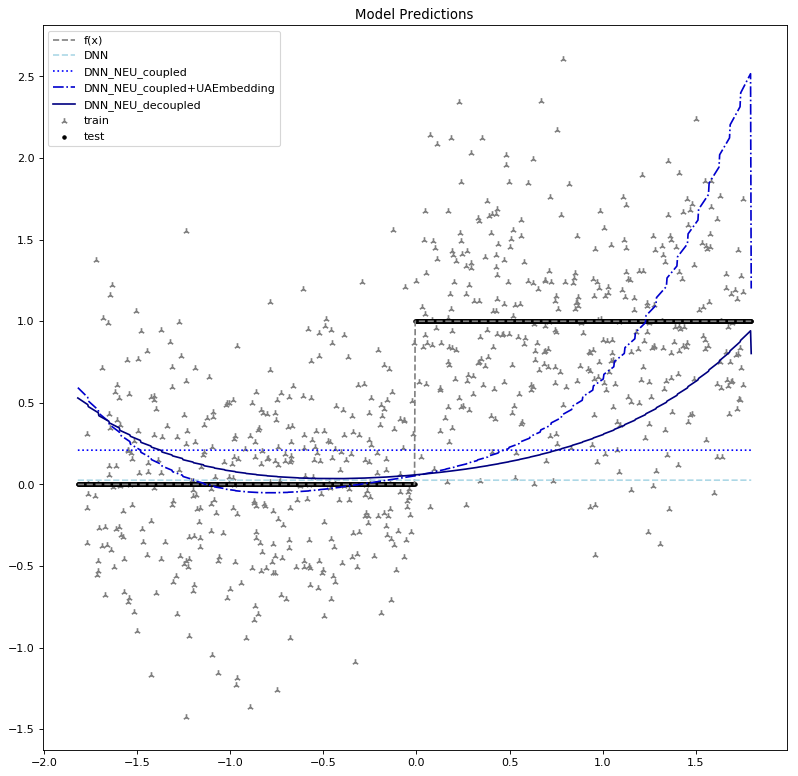

In [61]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.eps', format='eps')
plt.show()

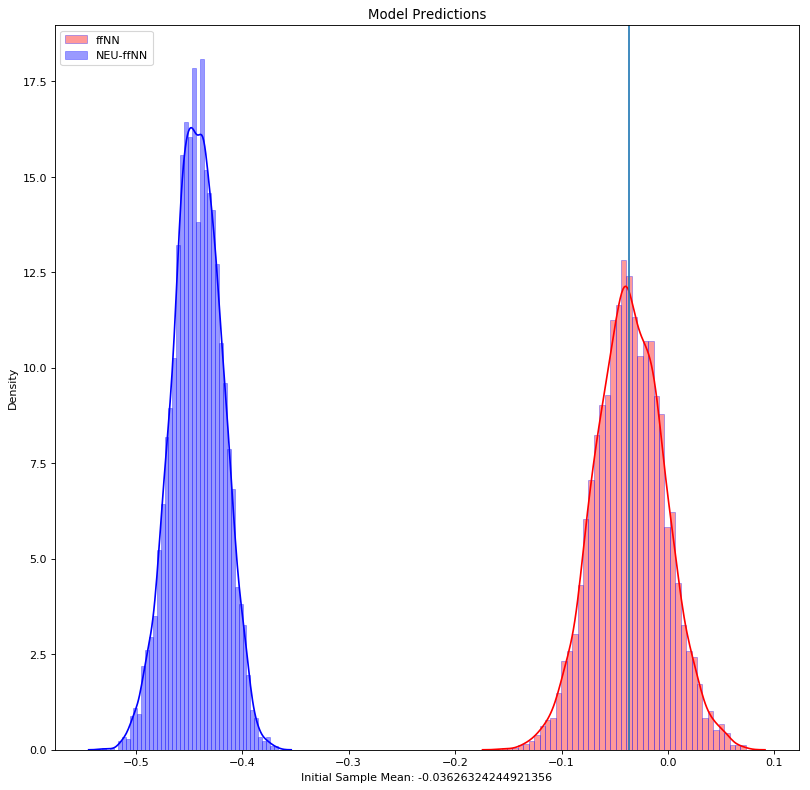

In [210]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test_w_proj,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [174]:
#==========#
# Training #
#==========#
train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0]}).transpose()

train_performance.to_latex("./outputs/tables/Train_performance.tex")

#=========#
# Testing #
#=========#
test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1]}).transpose()

test__performance.to_latex("./outputs/tables/Test_performance.tex")

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


# Visualize Predictions

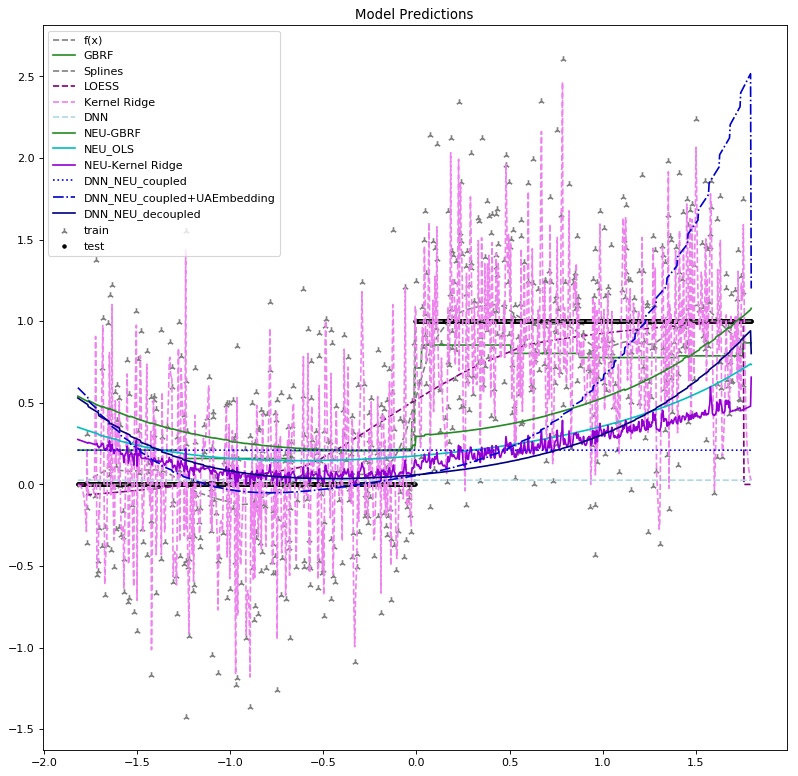

In [62]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen', label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.eps', format='eps')
plt.show()

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [73]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
NEU-OLS-Performance:
           train        test
MAE     0.553265    0.409622
MSE     0.481910    0.230677
MAPE  241.751815  161.298792


In [20]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
         train        test
MAE   0.005476    0.309726
MSE   0.000157    0.160939
MAPE  2.673027  124.043649
NEU-Kernel Ridge-Performance:
           train        test
MAE     0.572292    0.403223
MSE     0.513304    0.258526
MAPE  675.692020  193.379733


In [21]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
           train       test
MAE     0.430048   0.160843
MSE     0.296299   0.029043
MAPE  124.933598  56.762638
NEU-GBRF-Performance:
           train        test
MAE     0.548921    0.373426
MSE     0.473324    0.173200
MAPE  156.118464  105.314191


In [22]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
            train       test
MAE      0.405837   0.078766
MSE      0.262731   0.011532
MAPE  1624.868842  54.099630
LOESS Performance:
            train      test
MAE      0.443298  0.144073
MSE      0.312644  0.048456
MAPE  8120.379911       NaN


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [23]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
print("NEU-ffNN (Decoupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
            train        test
MAE      0.709694    0.499544
MSE      0.776678    0.434498
MAPE  1014.538899  713.956023
NEU-ffNN (Coupled) Performance:
           train        test
MAE     0.656752    0.499715
MSE     0.659062    0.333899
MAPE  312.953262  238.121889
NEU-ffNN (Coupled+UAEmbedding) Performance:
            train        test
MAE      0.591281    0.379266
MSE      0.565178    0.284482
MAPE  1757.608086  198.210784
NEU-ffNN (Decoupled) Performance:
           train        test
MAE     0.614054    0.400057
MSE     0.597511    0.267703
MAPE  546.118001  270.570382


# Report

## Train-Set Performance

In [175]:
train_performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.037417,6.780206e-15,0.036895,0.411391,0.262034,791.610084
LOESS,-0.025334,1.341227e-02,0.052109,0.432476,0.297360,4875.253357
NEU-OLS,0.182107,2.291464e-01,0.276890,0.553265,0.481910,241.751815
Kernel,-0.000702,1.089912e-04,0.000887,0.005176,0.000124,6.731961
NEU-KerRidge,0.245362,2.883710e-01,0.330856,0.534711,0.448478,846.756182
GBRF,-0.038595,2.842171e-17,0.038453,0.425154,0.289827,139.104610
NEU-GBRF,0.040741,8.694927e-02,0.133093,0.520315,0.424218,149.712570
ffNN,0.423189,4.727282e-01,0.522809,0.680824,0.714065,2620.858871
NEU-ffNN (Readout-Form),0.239052,2.888250e-01,0.339753,0.612214,0.574072,291.730311
NEU-ffNN (Coupled),0.051702,1.018606e-01,0.153551,0.572205,0.522619,1399.777916


## Test-Set Performance

In [176]:
test__performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.004944,0.002001,0.008906,0.087441,0.012737,55.252206
LOESS,0.013669,0.026975,0.040420,0.144161,0.048275,NaN
NEU-OLS,0.195197,0.220728,0.246974,0.409622,0.230677,161.298792
Kernel,0.020042,0.045656,0.070848,0.328836,0.178752,237.363778
NEU-KerRidge,0.275729,0.300880,0.326038,0.404698,0.263040,201.230223
GBRF,-0.013115,-0.000861,0.011355,0.194653,0.039147,62.182380
NEU-GBRF,0.052531,0.076928,0.102036,0.373426,0.173200,105.314191
ffNN,0.443318,0.473561,0.504777,0.499470,0.474192,1919.869613
NEU-ffNN (Readout-Form),0.259413,0.289656,0.319900,0.499715,0.333899,238.121889
NEU-ffNN (Coupled),0.035729,0.067848,0.099898,0.379266,0.284482,198.210784


#### The END

---